In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("train_all.csv")
train

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean,review_rates_min,review_rates_max,brand_id,brand_name,category_id,category_name
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,25,0.328947,0.003045,3.250000,1,5,682,Slazenger,604,T-Shirt
1,2021-05-01 00:00:01.761000+00:00,3941815,0,157306,901280145,595758968,36888320,65612791,59.99,49.99,...,7,0.777778,0.000744,0.000000,0,0,381,Ltb,2949,Polo Yaka T-shirt
2,2021-05-01 00:00:01.761000+00:00,3941815,0,163856,901280144,595758968,36888399,65613254,49.90,49.90,...,3,0.200000,0.000633,0.000000,0,0,381,Ltb,2949,Polo Yaka T-shirt
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,129.95,59.97,...,0,0.000000,0.000545,4.476190,1,5,121,Pierre Cardin,604,T-Shirt
4,2021-05-01 00:00:02.742000+00:00,15996105,1,968,901279297,595758987,96930601,161408176,89.99,71.99,...,0,0.000000,0.002828,4.500000,2,5,40,TRENDYOLMİLLA,1182,Elbise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10702712,2021-07-30 23:59:58.335000+00:00,14877765,0,112044,1106635719,721367377,120102810,193463391,179.95,179.95,...,25,0.050302,0.003462,5.000000,5,5,4951,Pull & Bear,526,Etek
10702713,2021-07-30 23:59:59.290000+00:00,25067941,1,163,1106635937,721367381,123501317,199281489,199.95,71.98,...,0,0.000000,0.000545,4.480000,1,5,19,U.S. Polo Assn.,604,T-Shirt
10702714,2021-07-30 23:59:59.290000+00:00,25067941,1,163,1106635936,721367381,123501233,199281191,169.95,62.38,...,0,0.000000,0.000545,4.263158,1,5,19,U.S. Polo Assn.,604,T-Shirt
10702715,2021-07-30 23:59:59.290000+00:00,25067941,1,163,1106635935,721367381,94575220,157698762,349.95,143.98,...,0,0.000000,0.000545,5.000000,5,5,19,U.S. Polo Assn.,597,Gömlek


In [5]:
drop_cols = ["user_id", "supplier_id", "order_line_item_id", "order_parent_id",
             "product_content_id", "product_variant_id", "coupon_id", 'brand_id', 'category_id']

train = train.drop(drop_cols, axis=1)

In [6]:
train.head()

,order_date,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_name,promotion_award_value,is_wallet_trx,is_saved_card_trx,...,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean,review_rates_min,review_rates_max,brand_name,category_name
0,2021-05-01 00:00:01.761000+00:00,0,79.90,51.94,8.88,0.0,Sepette %35 İndirim,35.0,0,True,...,16357,76,25,0.328947,0.003045,3.25000,1,5,Slazenger,T-Shirt
1,2021-05-01 00:00:01.761000+00:00,0,59.99,49.99,10.67,0.0,NaN,NaN,0,True,...,902,9,7,0.777778,0.000744,0.00000,0,0,Ltb,Polo Yaka T-shirt
2,2021-05-01 00:00:01.761000+00:00,0,49.90,49.90,10.67,0.0,NaN,NaN,0,True,...,227,15,3,0.200000,0.000633,0.00000,0,0,Ltb,Polo Yaka T-shirt
3,2021-05-01 00:00:01.761000+00:00,0,129.95,59.97,9.40,0.0,Sepette %40 İndirim,40.0,0,True,...,46699,0,0,0.000000,0.000545,4.47619,1,5,Pierre Cardin,T-Shirt
4,2021-05-01 00:00:02.742000+00:00,1,89.99,71.99,9.40,0.0,Sepette %20 İndirim,20.0,0,False,...,3269293,0,0,0.000000,0.002828,4.50000,2,5,TRENDYOLMİLLA,Elbise


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702717 entries, 0 to 10702716
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_date                  object 
 1   is_elite_user               int64  
 2   original_price              float64
 3   discounted_price            float64
 4   ship_cost                   float64
 5   coupon_discount             float64
 6   promotion_name              object 
 7   promotion_award_value       float64
 8   is_wallet_trx               int64  
 9   is_saved_card_trx           bool   
 10  is_returned                 float64
 11  returnRate                  float64
 12  total_claim                 int64  
 13  unresolved_claim            int64  
 14  unresolved_accepted_claim   int64  
 15  unresolvedclaim_percentage  float64
 16  defective_returnRate        float64
 17  review_rates_mean           float64
 18  review_rates_min            int64  
 19  review_rates_max   

In [8]:
train.isnull().sum()

order_date                          0
is_elite_user                       0
original_price                      0
discounted_price                    0
ship_cost                       34156
coupon_discount                     0
promotion_name                5421113
promotion_award_value         5421113
is_wallet_trx                       0
is_saved_card_trx                   0
is_returned                         0
returnRate                          0
total_claim                         0
unresolved_claim                    0
unresolved_accepted_claim           0
unresolvedclaim_percentage          0
defective_returnRate                0
review_rates_mean                   0
review_rates_min                    0
review_rates_max                    0
brand_name                          0
category_name                       0
dtype: int64

In [9]:
train.describe()

,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_wallet_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean,review_rates_min,review_rates_max
count,1.070272e+07,1.070272e+07,1.070272e+07,1.066856e+07,1.070272e+07,5.281604e+06,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07,1.070272e+07
mean,3.161868e-01,9.913625e+01,6.725463e+01,5.781026e+00,-9.168296e-01,2.773738e+01,4.090697e-01,1.271860e-01,9.759944e-02,1.330868e+06,2.894457e+02,1.342881e+02,2.014782e-01,1.985007e-03,4.045602e+00,1.412795e+00,4.767474e+00
std,4.649868e-01,1.014046e+02,6.449114e+01,3.438618e+00,6.222714e+00,1.661043e+01,4.916622e-01,3.331813e-01,4.269889e-02,1.556925e+06,6.760213e+02,4.332840e+02,2.940830e-01,1.261946e-03,9.818953e-01,1.102468e+00,1.016095e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.776000e-01,-5.990000e+02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.999000e+01,3.499000e+01,2.960000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,6.142014e-02,1.323200e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.780535e-04,3.957486e+00,1.000000e+00,5.000000e+00
50%,0.000000e+00,6.999000e+01,5.099000e+01,4.700000e+00,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.085198e-01,1.701780e+05,1.000000e+00,0.000000e+00,0.000000e+00,2.100840e-03,4.294643e+00,1.000000e+00,5.000000e+00
75%,1.000000e+00,1.199800e+02,7.999000e+01,9.400000e+00,0.000000e+00,3.500000e+01,1.000000e+00,0.000000e+00,1.271101e-01,3.269293e+06,1.620000e+02,5.200000e+01,2.759009e-01,2.827527e-03,4.544304e+00,1.000000e+00,5.000000e+00
max,1.000000e+00,1.222000e+04,6.950000e+03,1.320000e+01,2.000000e-02,2.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.269293e+06,5.673000e+03,5.102000e+03,1.000000e+00,2.727273e-01,5.000000e+00,5.000000e+00,5.000000e+00


### Missing Values

In [10]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

ship_cost 0.0032  % missing values
promotion_name 0.5065  % missing values
promotion_award_value 0.5065  % missing values


### Numerical Features

In [11]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  18


,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean,review_rates_min,review_rates_max
0,0,79.90,51.94,8.88,0.0,35.0,0,True,0.0,0.098178,16357,76,25,0.328947,0.003045,3.25000,1,5
1,0,59.99,49.99,10.67,0.0,NaN,0,True,0.0,0.093355,902,9,7,0.777778,0.000744,0.00000,0,0
2,0,49.90,49.90,10.67,0.0,NaN,0,True,0.0,0.108296,227,15,3,0.200000,0.000633,0.00000,0,0
3,0,129.95,59.97,9.40,0.0,40.0,0,True,0.0,0.050737,46699,0,0,0.000000,0.000545,4.47619,1,5
4,1,89.99,71.99,9.40,0.0,20.0,0,False,0.0,0.127110,3269293,0,0,0.000000,0.002828,4.50000,2,5


#### Discrete Variables

In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 6
['is_elite_user', 'is_wallet_trx', 'is_saved_card_trx', 'is_returned', 'review_rates_min', 'review_rates_max']


0.0    9341481
1.0    1361236
Name: is_returned, dtype: int64


<AxesSubplot:xlabel='is_returned', ylabel='count'>

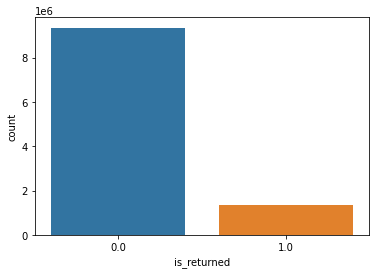

In [13]:
print(train.is_returned.value_counts())

sns.countplot(data=train, x="is_returned")

<ipython-input-14-5a0707a897d7>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


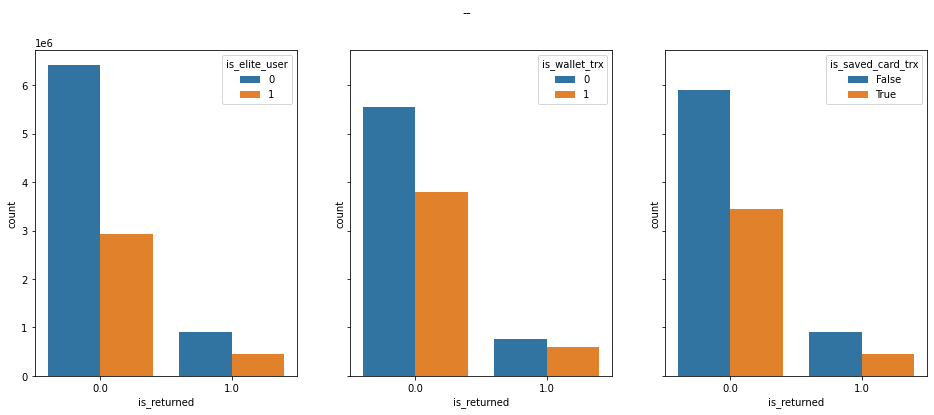

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle('--')

sns.countplot(data=train, x="is_returned", hue="is_elite_user", ax=ax[0])
sns.countplot(data=train, x="is_returned", hue="is_wallet_trx", ax=ax[1])
sns.countplot(data=train, x="is_returned", hue="is_saved_card_trx", ax=ax[2])

fig.show()

<ipython-input-15-2b55b68e8b8b>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


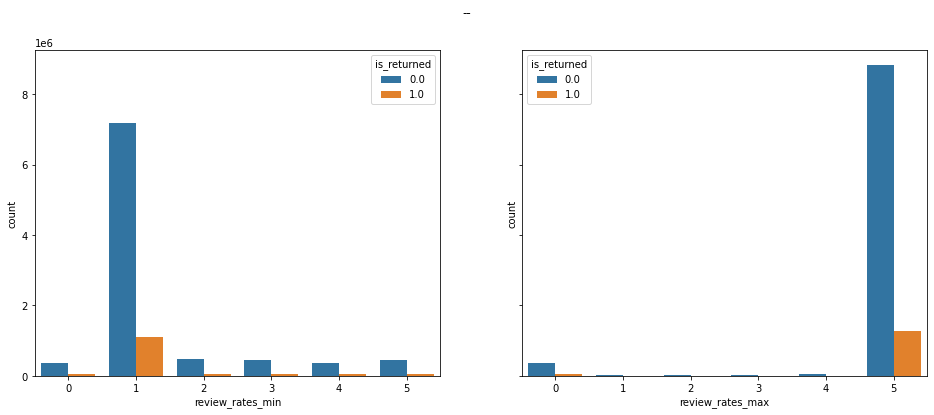

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('--')

sns.countplot(data=train, x="review_rates_min", hue="is_returned", ax=ax[0])
sns.countplot(data=train, x="review_rates_max", hue="is_returned", ax=ax[1])

fig.show()

#### Continuous Variables

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


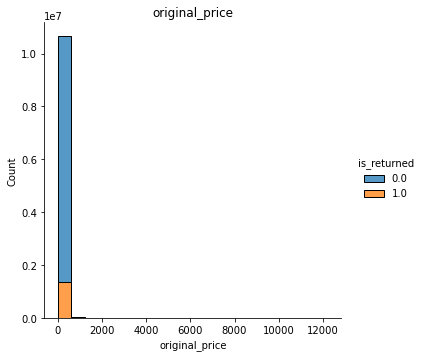

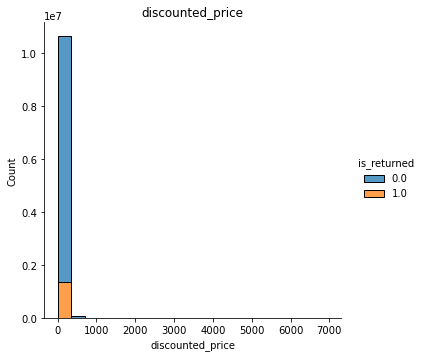

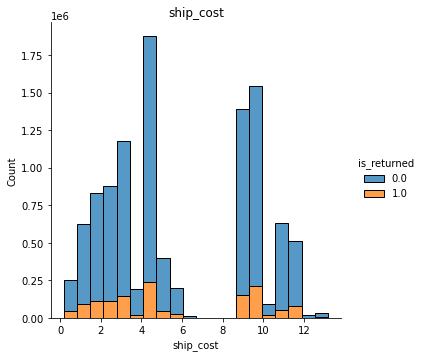

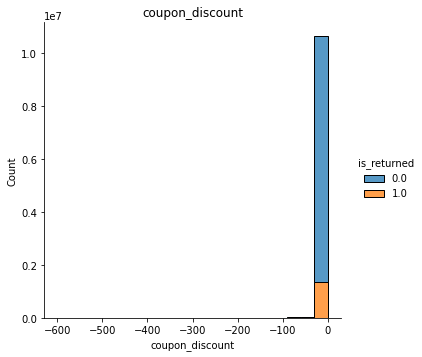

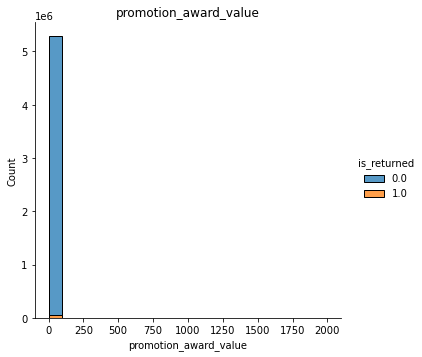

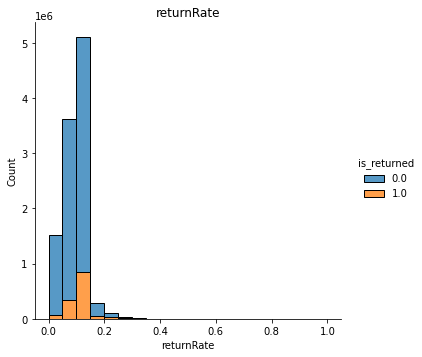

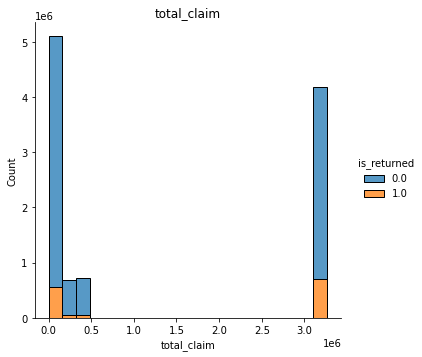

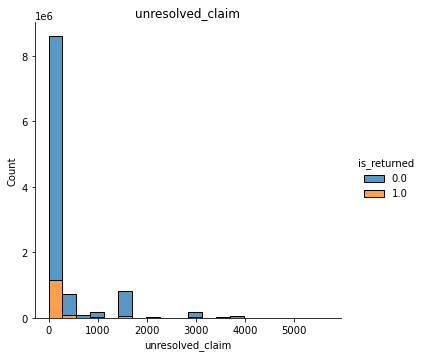

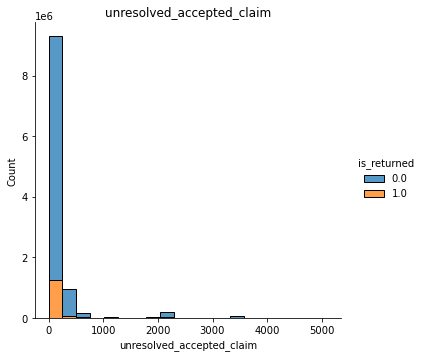

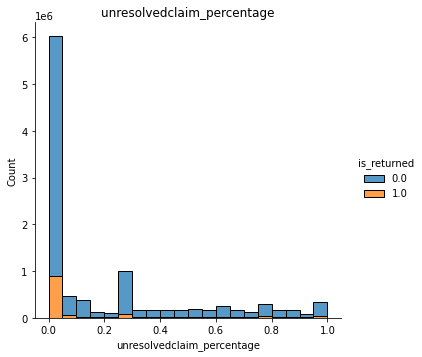

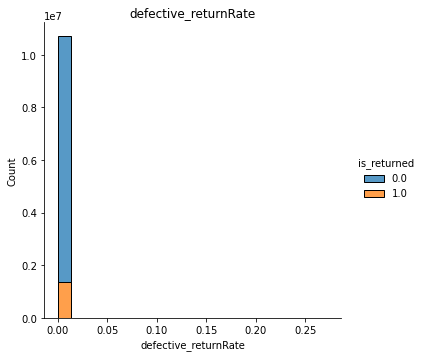

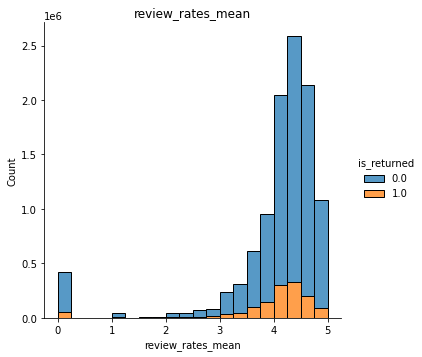

In [42]:
for feature in continuous_feature:
    data=train.copy()
    sns.displot(data=data, x=data[feature], hue="is_returned",  multiple="stack", bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Outliers

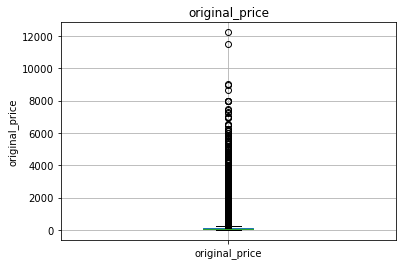

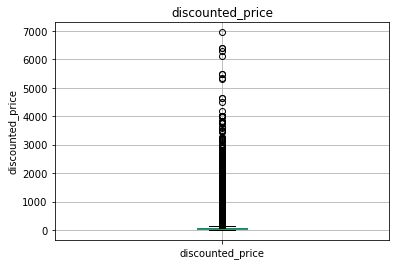

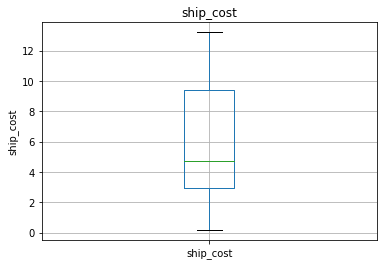

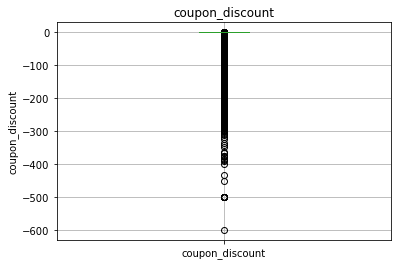

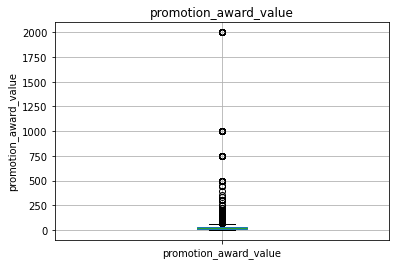

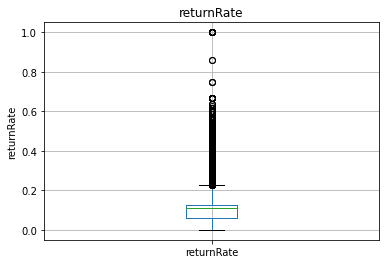

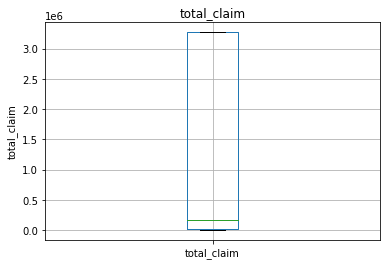

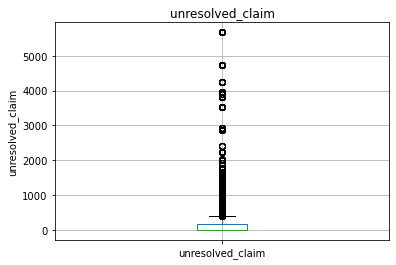

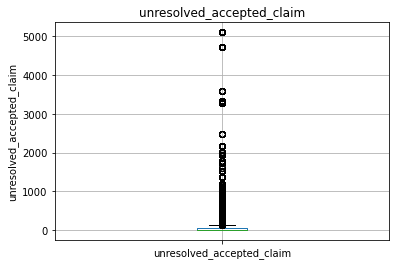

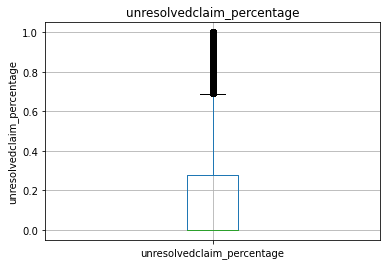

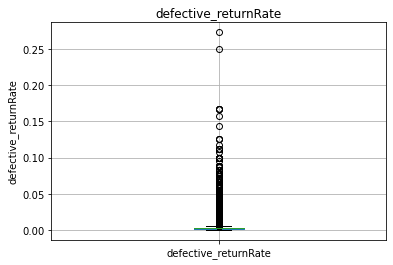

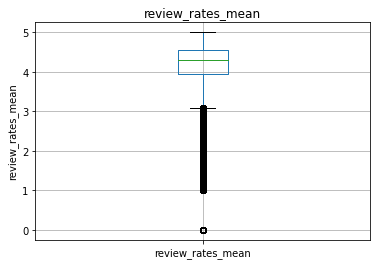

In [45]:
for feature in continuous_feature:
    data= train.copy()
    #data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
# boxplot
# correlation
# regplot

In [46]:
train.corr()

,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage,defective_returnRate,review_rates_mean,review_rates_min,review_rates_max
is_elite_user,1.000000,0.012825,0.001373,0.088561,0.005117,0.039717,0.149264,-0.156652,0.017137,-0.012846,-0.025134,-0.009519,-0.022138,-0.014288,-0.013600,-0.003551,0.052977,-0.029847
original_price,0.012825,1.000000,0.858192,0.217101,-0.013695,0.101816,-0.035438,0.004885,0.084401,0.232156,-0.140663,-0.064875,-0.044572,0.095968,0.063348,-0.102631,0.065345,-0.137322
discounted_price,0.001373,0.858192,1.000000,0.202025,-0.041506,-0.134525,-0.043593,0.002117,0.109685,0.305957,-0.038979,-0.073744,-0.046218,0.014693,0.127537,-0.093289,0.036741,-0.129329
ship_cost,0.088561,0.217101,0.202025,1.000000,0.055098,-0.084607,0.009525,-0.003433,-0.013477,-0.014661,-0.280680,-0.040855,-0.005925,0.222492,-0.060826,-0.159215,0.042676,-0.139444
coupon_discount,0.005117,-0.013695,-0.041506,0.055098,1.000000,0.049216,-0.056861,0.032917,0.051436,-0.054088,-0.079781,0.032864,0.027165,0.057637,-0.051790,-0.021535,0.015950,-0.018994
promotion_award_value,0.039717,0.101816,-0.134525,-0.084607,0.049216,1.000000,0.011432,-0.010191,-0.010107,-0.107129,-0.082126,0.042566,0.000404,0.007432,-0.080360,0.024132,0.087337,-0.003343
is_wallet_trx,0.149264,-0.035438,-0.043593,0.009525,-0.056861,0.011432,1.000000,-0.629566,0.018638,-0.000293,0.015677,-0.009572,-0.010179,-0.014362,0.005292,0.019615,0.003932,0.014928
is_saved_card_trx,-0.156652,0.004885,0.002117,-0.003433,0.032917,-0.010191,-0.629566,1.000000,-0.025212,-0.009153,-0.034981,0.009902,0.009544,0.026168,-0.015435,-0.021705,0.002938,-0.020096
is_returned,0.017137,0.084401,0.109685,-0.013477,0.051436,-0.010107,0.018638,-0.025212,1.000000,0.161417,0.097626,-0.051001,-0.033358,-0.053737,0.105498,-0.033360,-0.031077,-0.000058
returnRate,-0.012846,0.232156,0.305957,-0.014661,-0.054088,-0.107129,-0.000293,-0.009153,0.161417,1.000000,0.544971,-0.303961,-0.198640,-0.299112,0.615967,-0.035506,-0.077935,-0.002922


<AxesSubplot:>

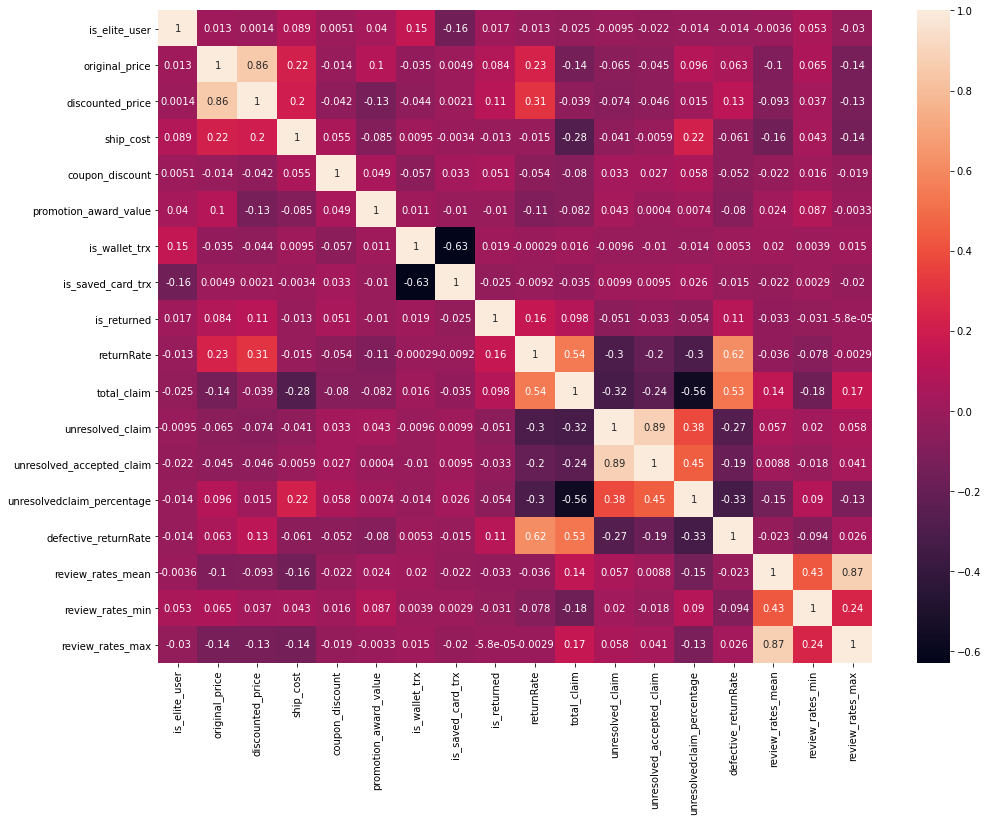

In [51]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), annot=True)

(0.0, 4.268164278815067)

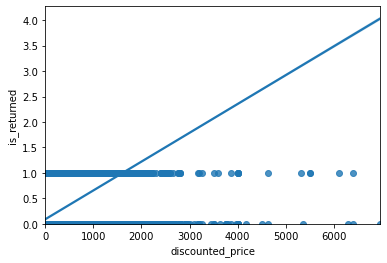

In [52]:
sns.regplot(x="discounted_price", y="is_returned", data=train)
plt.ylim(0,)